In [9]:
import numpy as np
import matplotlib.pyplot as plt
from utils.linear_approximator import linapx
from utils.radial_basis_approximator import rbapx
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Task4

## Part 1

In [3]:
X = np.loadtxt("data/takens_1.txt")

#### Plot the first coordinate against line number

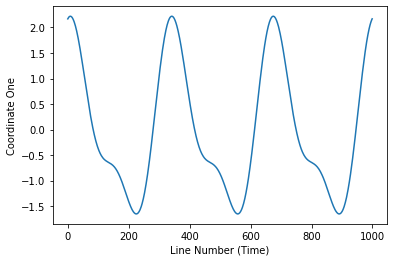

In [4]:
plt.plot(X[:,0])
plt.ylabel("Coordinate One")
plt.xlabel("Line Number (Time)")
plt.show()

#### With time delay

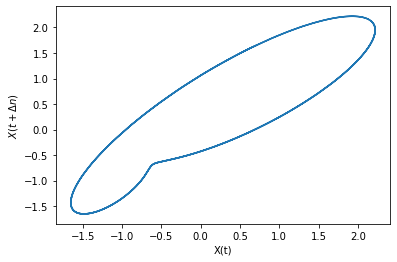

In [5]:
dn = 20
X_lag0 = X[:-dn*2]
X_1ag1 = X[dn:-dn]
X_lag2 = X[2*dn:]
plt.plot(X_lag0[:, 0], X_1ag1[:,0])
plt.xlabel("X(t)")
plt.ylabel(r"$X(t+\Delta n)$")
plt.show()

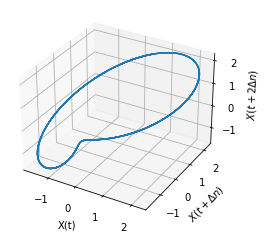

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_lag0[:, 0], X_1ag1[:,0], X_lag2[:, 0])
#ax.view_init(40, 0)
ax.set_xlabel("X(t)")
ax.set_ylabel(r"$X(t+\Delta n)$")
ax.set_zlabel(r"$X(t+2\Delta n)$")

plt.show()

## Part 2

In [13]:
def lorenz(t, state):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

#### The Lorenz Attractor

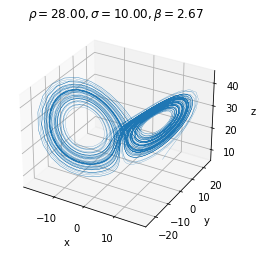

In [34]:
rho = 28.0 
sigma = 10.0
beta = 8.0 / 3.0

t_start, t_end = 0, 100
Num = 5000
t = np.linspace(t_start, t_end, Num)

x0 = (10,10,10)

sol = solve_ivp(lorenz, [t_start, t_end], x0, t_eval=t)
states = sol.y.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2], linewidth=0.2)
ax.title.set_text(r"$\rho=%.2f, \sigma=%.2f, \beta=%.2f$"%(rho, sigma, beta))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

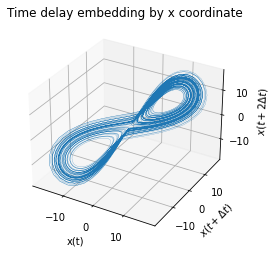

In [66]:
dn = 3
X_lag0 = states[:-dn*2, 0]
X_lag1 = states[dn:-dn, 0]
X_lag2 = states[2*dn:, 0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_lag0, X_1ag1, X_lag2, linewidth=0.2)
ax.title.set_text("Time delay embedding by x coordinate")
ax.set_xlabel("x(t)")
ax.set_ylabel(r"$x(t+\Delta t)$")
ax.set_zlabel(r"$x(t+2\Delta t)$")
plt.show()

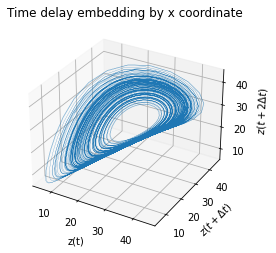

In [67]:
dn = 3
Z_lag0 = states[:-dn*2, 2]
Z_1ag1 = states[dn:-dn, 2]
Z_lag2 = states[2*dn:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(Z_lag0, Z_1ag1, Z_lag2, linewidth=0.2)
ax.title.set_text("Time delay embedding by x coordinate")
ax.set_xlabel("z(t)")
ax.set_ylabel(r"$z(t+\Delta t)$")
ax.set_zlabel(r"$z(t+2\Delta t)$")
plt.show()

#### Why an embedding using z coordinates fails?

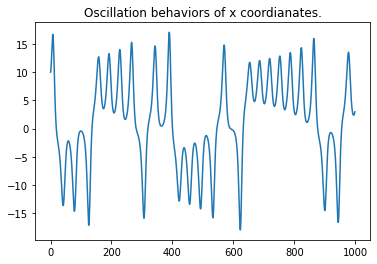

In [62]:
plt.plot(X_lag0[:1000])
plt.title("Oscillation behaviors of x coordianates.")
plt.show()

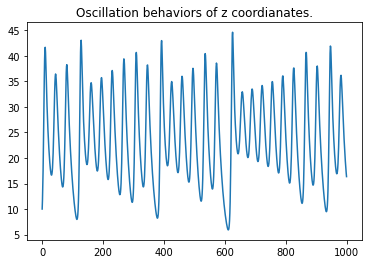

In [81]:
plt.plot(Z_lag0[:1000])
plt.title("Oscillation behaviors of z coordianates.")
plt.show()

#### Comments:

Observe that both of x and z coordiantes have oscillation behaviors; however, the oscillation behavior of x looks much complicated than the one of z's. Moreover, the oscillation behavior of z looks very much like the one of a circle in 3D space. As the local extrema values vary along z's oscllation, this results in a ring in 3D space. This analysis agrees with the time-delay plot of z coordinates in figure ?.

Another reason why an embedding using z coordinates fails is that, the maniford of Lorenz attractor is locally in 2D space. According to Takens Theorem, we need 4 delays of z (in total 5 coordinates)to construct a correct delay embeddings with probability 1. Therefore, using 2 delays of z does not guaranteed an embedding of the true system by theory, which happens in our case.

### Bonus

#### Get valud of $v(x_1, x_2, x_3)$ based on daleyed $x$

In [72]:
dt = t_end/Num # The time step we used in the solve_ivp
X0 = np.column_stack((X_lag0[:-1], X_lag1[:-1], X_lag2[:-1]))
X1 = np.column_stack((X_lag0[1:], X_lag1[1:], X_lag2[1:]))
dX = X1-X0
VX = dX / dt

#### Approximate v(.) using radial-basis nonlinear approximator

In [80]:
task4bonus = rbapx(X0, VX)
task4bonus.fit(L=2000)
vhat = task4bonus.predict()
X1_hat = X0 + vhat*dt
MSE = np.square(X1 - X1_hat).mean()
print("Mean Squared Error:", MSE)

Mean Squared Error: 1.2207561250682816e-05
